# Data Loading

Get some data to play with

In [7]:
from sklearn.datasets import fetch_openml
blood = fetch_openml('blood-transfusion-service-center')
print(blood.DESCR)

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bl

In [8]:
blood.data.shape

(748, 4)

In [9]:
blood.data

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [0]:
import pandas as pd
X = pd.DataFrame(blood.data, columns=['recency', 'frequency', 'total_amount', 'since_first'])

In [11]:
blood.target.shape

(748,)

In [0]:
blood.target

In [13]:
y = pd.Series(blood.target)
y.value_counts()

1    570
2    178
dtype: int64

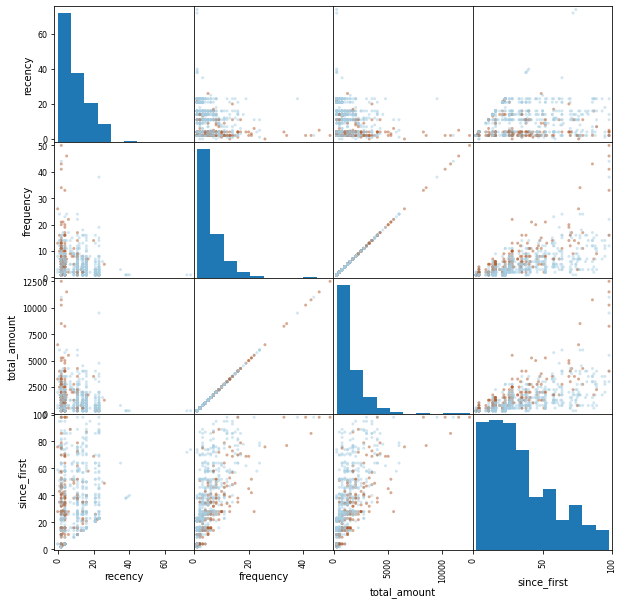

In [14]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X, c=y=='2', cmap='Paired', figsize=(10, 10));

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#can set random state as seed as argument in train_test split

In [15]:
X.shape

(748, 4)

In [18]:
X_train.shape

(561, 4)

In [19]:
X_test.shape

(187, 4)

# Exercises

## Exercise 1

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``blood``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.
``print(iris.DESCR)``

Split the data into training and test set.

## Exercise 2

Usually data doesn't come in that nice a format. You can find the csv file that contains the iris dataset at the following path:

```python
import sklearn.datasets
import os
iris_path = os.path.join(sklearn.datasets.__path__[0], 'data', 'iris.csv')
```
Load the data from there using pandas ``pd.read_csv`` method and bring it into the same format as before with the data in a variable X and the labels in a variable y. The first few lines of ``iris.csv`` file looks like:

```
150,4,setosa,versicolor,virginica
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
```

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

print("Dataset size: %d  number of features: %d  number of classes: %d"
      % (X.shape[0], X.shape[1], len(np.unique(y))))


Dataset size: 150  number of features: 4  number of classes: 3


Text(0, 0.5, 'petal width (cm)')

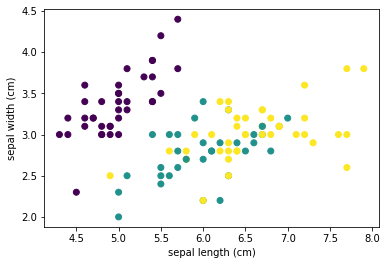

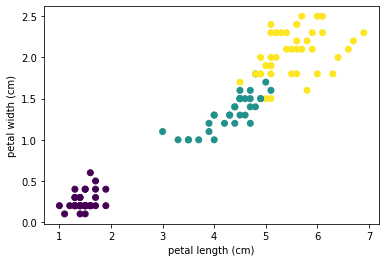

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.figure()
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


In [37]:
import sklearn.datasets
import os
import pandas as pd
iris_path = os.path.join(sklearn.datasets.__path__[0], 'data', 'iris.csv')
iris_df =  pd.read_csv(iris_path, header=None)
display(iris_df.head())

iris_df = pd.read_csv(iris_path, skiprows=1, header=None)
display(iris_df.head())

features = iris_df.iloc[:, :4]
target = iris_df.iloc[:, 4]

,0,1,2,3,4
0,150.0,4.0,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
